In [35]:
from mohan.Similarity import Similarity
from mohan.ColavSimilarity import parse_doi, parse_string
from mohan.Schemas import openalex_works
from joblib import Parallel, delayed
import pickle
import numpy as np
from mohan.ColavSimilarity import ColavSimilarity, parse_doi, parse_string
from mohan.Schemas import kahi_works
from elasticsearch import Elasticsearch, __version__ as es_version
from sklearn import metrics
import matplotlib.pyplot as plt

In [14]:
s = Similarity("openalex_parsed",schema = openalex_works)

In [13]:
# open a file, where you stored the pickled data
file = open('dataset_full.pkl', 'rb')
# dump information to that file
data = pickle.load(file)
# close the file
file.close()

In [10]:
scopus = []
np.random.shuffle(data["p"])
np.random.shuffle(data["n"])
for i in data["p"]:#[0:5001]:
    scopus.append((i,True))
for i in data["n"]:#[0:5000]:
    scopus.append((i,False))
np.random.shuffle(scopus) #shuffle is inplace
results = Parallel(n_jobs=64,backend='threading',verbose=2)(delayed(s.search)(rec[0]['Title'],rec[0]['Authors'],rec[0]['Source title'],rec[0]['Year'],
                 rec[0]['Volume'], rec[0]['Issue'], rec[0]['Page start'], rec[0]['Page end'],
                 ratio_thold = 90, partial_thold = 95, low_thold = 80) for rec in scopus)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done 237 tasks      | elapsed:    3.1s
[Parallel(n_jobs=64)]: Done 520 tasks      | elapsed:    6.8s
[Parallel(n_jobs=64)]: Done 885 tasks      | elapsed:   10.9s
[Parallel(n_jobs=64)]: Done 1330 tasks      | elapsed:   16.2s
[Parallel(n_jobs=64)]: Done 1857 tasks      | elapsed:   20.0s
[Parallel(n_jobs=64)]: Done 2464 tasks      | elapsed:   28.0s
[Parallel(n_jobs=64)]: Done 3153 tasks      | elapsed:   34.8s
[Parallel(n_jobs=64)]: Done 3922 tasks      | elapsed:   42.5s
[Parallel(n_jobs=64)]: Done 4773 tasks      | elapsed:   50.0s
[Parallel(n_jobs=64)]: Done 5704 tasks      | elapsed:  1.0min
[Parallel(n_jobs=64)]: Done 6717 tasks      | elapsed:  1.2min
[Parallel(n_jobs=64)]: Done 7810 tasks      | elapsed:  1.4min
[Parallel(n_jobs=64)]: Done 8985 tasks      | elapsed:  1.6min
[Parallel(n_jobs=64)]: Done 10240 tasks 

In [11]:
actual = []
predicted = []
for i in range(len(results)):
    actual.append(scopus[i][1])
    if results[i] is not None:
        predicted.append(True)
    else:
        predicted.append(False)        

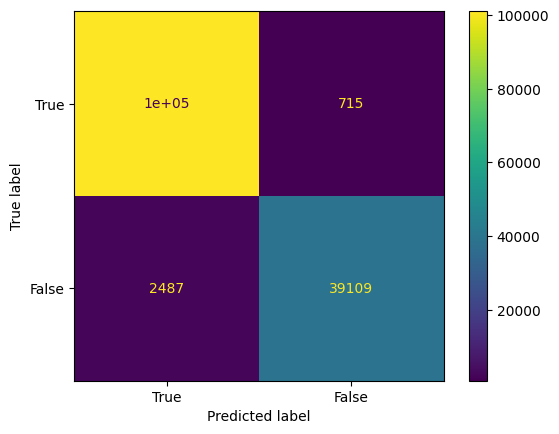

In [12]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)
confusion_matrix = np.flip(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [13]:
fn = confusion_matrix[0][1]*100/(confusion_matrix[0][0]+confusion_matrix[0][1])
fn

0.7025438967113085

In [14]:
fp = confusion_matrix[1][0]*100/(confusion_matrix[1][0]+confusion_matrix[1][1])
fp

5.978940282719492